# Jegyzőkönyv 7 számolások

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import schemdraw
from schemdraw import logic
from schemdraw.parsing import logicparse
from sympy import symbols, Not, Or, And
from sympy.logic.boolalg import simplify_logic
from tabulate import tabulate

In [2]:
def logic_form_print(formula) -> None:
    print(str(formula).upper().replace("|", "∪").replace("&", "∩").replace(" ", ""))

## 1. feladat: DAC

A feladat egy Digitál analóg konverter készítése, ami a fizikai kapcsolók helyett egy 74HCT4053 chipet használ.

### Áramkör

[![Áramkör](./jegyzokonyv07/feladat1.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgLCAMB0l3BWEBGGAmOaDsWDMkAONANgE5SsQFIrxcqBTAWmWQCgAlEXNENNCDz5ZeNGmBpIxUaAjYAPPhDQF6YXiuLgUWgE4MAZm10hSW5KV5m+CLTQxw2Ad24aBrlJajHT5r8mIaC1EUeB8AoK9+CGCoUMcTaM8NAgJkuNQEj1jrWKCwkwj0orRbOIdIHyTYpNK7PgK+VPSVNLrysIBzJray1uEQyoBlXxsta36gkAMAQwAbAGcGcrYRkrKS5qnZxeX7Vb53dtqtlGn5pZXFfhTkPnwmiBjzBRQ+oh1lAiRnvlfSegqGKQO4qSi-MDOJT2ZoCGj4CCVFzILBafoorQI7zI5ApNKsXhYpEoXHcSAxVFkxFQjFU6F04lwun9Ilsbos8k9VzSYkEGFpPncBCiGlgL74sVCkUuDBtWGEKXYkCC3DClCS1XS9WCNWyxWMhWa+lGyq4LD2CSKnjwtV3MRQ61WtUmtncXCYgiCd3gAJxYm4b24T1W4OVEwSeGco1Ew6OFxgX3utJgIRJpUpwnEZOpzn+jB0x0u+NwOkZhkO51R-OsgAOdEz2d4Zfo9u6ZfbQjAxER3gkpCtWZ9mMHdugWiYxGgATQZkCpGoAbQQhgkCXds43GDAa0Ccx3ukltJPNkG6DTxLZ-rfvANBYgxkciAA)

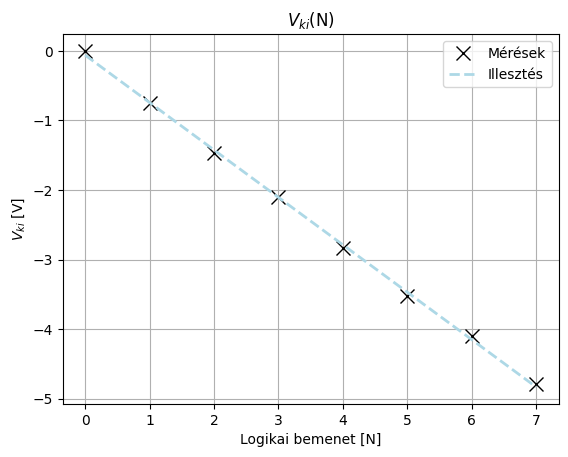

  #	  Bemenet [N]	  Kimenet [V]
  0	            0	    -0.000649
  1	            1	    -0.743
  2	            2	    -1.468
  3	            3	    -2.103
  4	            4	    -2.833
  5	            5	    -3.529
  6	            6	    -4.1
  7	            7	    -4.794


In [64]:
from scipy.stats import linregress

N_be = pd.array([0, 1, 2, 3, 4, 5, 6, 7])

V_ki = pd.array(
    [
        -649 * 10 ** -6,
        -743 * 10 ** -3,
        -1468 * 10 ** -3,
        -2103 * 10 ** -3,
        -2833 * 10 ** -3,
        -3529 * 10 ** -3,
        -4100 * 10 ** -3,
        -4794 * 10 ** -3,
    ]
)

fit = linregress(N_be, V_ki)
fit_y = fit.slope * N_be + fit.intercept

# plot v_ki by v_be
plt.plot(N_be, V_ki, "x", color="black", markersize=10, label="Mérések")
plt.plot(N_be, fit_y, "--", color="lightblue", linewidth=2, label="Illesztés")
plt.title("$V_{ki}$(N)")
plt.xlabel("Logikai bemenet [N]")
plt.ylabel("$V_{ki}$ [V]")
plt.legend()
plt.grid()
plt.show()

# create table and show it
table = pd.DataFrame({"v_be": N_be, "v_ki": V_ki})
print(tabulate(table, ["#", "Bemenet [N]", "Kimenet [V]"], tablefmt="tsv"))

## 2. feladat: Fürészjel


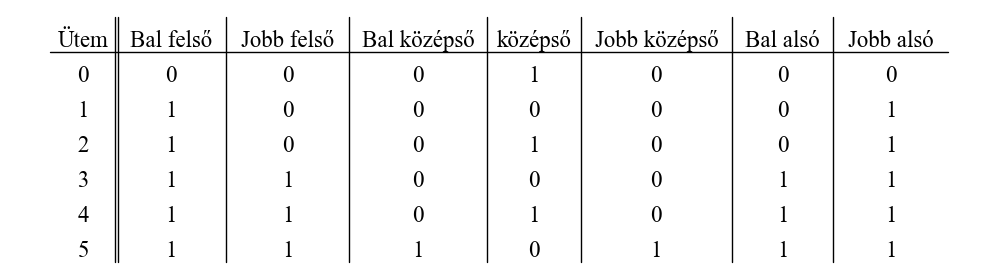

In [4]:
a1, a0, b1, b0 = symbols('a1,a0,b1,b0')

truth_table = """
Ütem | Bal felső | Jobb felső | Bal középső | középső | Jobb középső | Bal alsó | Jobb alsó
--------------------------------------------------------------------------------------------
0    | 0         | 0          | 0           | 1       | 0            | 0        | 0
1    | 1         | 0          | 0           | 0       | 0            | 0        | 1
2    | 1         | 0          | 0           | 1       | 0            | 0        | 1
3    | 1         | 1          | 0           | 0       | 0            | 1        | 1
4    | 1         | 1          | 0           | 1       | 0            | 1        | 1
5    | 1         | 1          | 1           | 0       | 1            | 1        | 1
"""

logic.Table(truth_table, colfmt='c||c|c|c|c|c|c|c', fontsize=18, font="times new roman")

### Áramkör

[![Áramkör](./jegyzokonyv07/feladat2.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgLCAMB0l3BWEBGGAmOaDsWDMkAONANgE5SsQFIrxcqBTAWmWQCgAlEXNENNCDz5ZeNGmBpIxUaAjYAPPhDQF6YXiuLgUWgE4MAZm10hSW5KV5m+CLTQxw2Ad24aBrlJajHT5r8mIaC1EUeB8AoK9+CGCoUMcTaM8NAgJkuNQEj1jrWKCwkwj0orRbOIdIHyTYpNK7PgK+VPSVNLrysIBzJray1uEQysV+FOQ+fCaIGPMFFD6iHWUCJGm+WdJ6FRjIMZVKVbBnJXtmgRp8CEqXZCwtfputC+9r5BS01l4nq5RX7kgY25-S5HB5A45g75nMH9L5sbow-49VzSb4EE5pNHcBCiEFgJbvPFYnEuDBtU6EInPECY3DYlCE2nE+mCOmkymQimM8Fcyq4LD2CSUnjnOljMRHYVCuk8uHcXCPAiCeXgAJxb64ZW4RVC7WVEwSc6IrlfPgOI5gVXytJgIRWqk2z7Ea22xHqjBgyUylwGsEOiES6VG92wgAOdEdzt4fvo4u6fvjQjAxEu3gkpCFTpVj0zYugWiYxGgpDRZACYAQyFwN0BMEgaCr3i4WqVWgtj2V0kFvxRsk43G1Pub4bV4BoLEGMjkRWs7RnzV2+XgS8cRRKZRK84a8WXYRK7natU37syO8cLw0IhQKgGVNebUvd+4me+oOwvBql5fUQfXiHkMFb42Hcn5HAel7tD6L7XnayZPmkX6fAOaR-qBZQ+mA1pwFSTA0oiBaCK6bBliA+EQmC1pxEgUggAYACGAA2ADODDYcghKxCwhJst8OH2O4vE3jxbExF4Al5EcLC-H6klRlhlTdDJw6KUmKY8UkdpMGydpqe4Gr5upz4SepyqaZyHZGYKekkVp5kuKZ968JpAEgQpUJDk54iquKADG1mWSZbm6igsCnqeyDMJQaDQHihBEOoCAEMQqDIPBIXsCYHlIplVmLmefn2JemX9GpAFlEVIGKJp4G4BAmmsny2iqhw6X5Q0aRFWUuVEcQSD2eCLBRIKrZFuQo2kNQy7sC4trKrBOVHHNs2CIZ3rIUhcH2shma2itHjoZh4oSPQkqgn6gHnAQAD6yaXZAl3yAQrzhZdCAheNAhomxyZprdIU7JdLCXcgl1oCDWASm4tWYkkPHQ-xmLiXZwnpJliOtRxULcWwQA)

## 3. feladat: PWM

### Tapasztalat

A 220 mikrofarad kondenzátorral sokkal egyenesebb a jel, mint a 10 mikrofarados kondenzátorral.

### Áramkör

[![Áramkör](./jegyzokonyv07/feladat3.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgDOB0YzCsICMZICYaoOyYMxgByoBsAnCZiHBAgCw6UCmAtIogFABKIOqIqqNbryy8IEGtXBSUcNgA8+g1Pno1h+IiEGJNAJwYAzNgHcQTfBDyCmRQVfBsd129zCDLbkPi3SpCAwCGADYAzgwOpiw02iS8UUoEEWYWfALJECJJ8Uix6TmiJmasvHRxxVowDgDmRYglPLUlLmKFTPx2RN5tiTidWe3cvWYDvd5grSND3d44Q+ORApZT6DNzE4mZbRJ8mAU1W5b41otaOtJsAMbD27OaB9xHUojQsK9vMIjMFKiQcDzE5Both0qHICBQHzYumuGXwXROtyerwm202J2UYxRGTgd3RuwcCja+NQOGOcGEOAo2k0HHY0PuKxhfBxSJgjiICGmiggLFyJ00NEgZGFZCob3YpkQ0W4fQaoySDQkEClgiVCuEaXMGTS8zyAy1+SyKsN90QuV1ptyDMS4wAhCAACaGAIAVyCABcpABBHAAGi9qH9iH9YF9ACE-WHA2Hg2GIAAdACOvoAfL6ADwgC4ukLugD2AFt4yEgnmqgBLK5esMAYQAIsXq-Wk8gwPGAHaIAD8PeLYB7XaTYGQHa93cHIS9-cHieHbfb1e7jbjM7no9riGXNbbs5H7YHE4PQ+HHbYjONiEwmjNvEvmggTsCbs9knGABkkNK70g6kgr75AlCcJwTYD9jXPX9GWVEBALCSgHDA6UTnKE5oNg4CEM-JR8RQ-E0OCOCQNMOVPGNexdTlIYyLWaF0RuTxUKQZErnsDFXCUbYxBeD5hl+OBMGQTBCBIHAqEwGgxhedgalYuF2PklpiIYm4+lQtgAAcZW8BFZXQbhzgkehMkRNU1UsEgAH1bAssALIkEh8AsuAbMgRALJYCz2CAA)